<a href="https://colab.research.google.com/github/suuuuwimmer/study/blob/master/3-3.RidgeAndLasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 특성 공학과 규제

##다중 회귀

**다중 회귀**란 여러 개의 특성을 사용한 선형 회귀를 말한다.\
1개의 특성을 사용했을땐 직선을 학습하지만 2개의 특성을 사용한다면 평면을 학습하게 된다.\
이때 사용하는 **특성 공학**이란 기존의 특성들을 이용해 새로운 특성을 만들어내는 작업을 말한다.\

이번엔 농어의 높이와 길이를 이용해 농어의 두께(높이*길이)라는 새로운 특성을 만드는 것에 해당한다.

## 데이터 준비

###판다스

판다스란 인터넷에서 바로 데이터를 가져오는 기능을 포함한 파이썬 패키지이다.

In [ ]:
import pandas as pd

In [ ]:
perch_full = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full.head()

length   height   width
0     8.4     2.11    1.41
1    13.7     3.53    2.00
2    15.0     3.82    2.43
3    16.2     4.59    2.63
4    17.4     4.59    2.94

pandas에서 head()메소드는 **데이터프레임의 상위 5개 행(default)를 출력**하는 명령어이다.\
괄호 안에 숫자를 매개변수로 주면 그만큼의 행을 출력함\
ex) head(3) > 상위 3개 행 출력\
타깃 데이터는 이전과 동일하게 넘피를 이용해 준비한다.

In [ ]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기

fit()메소드: 입력 데이터의 구조를 분석, 변환에 필요한 정보를 학습하라는 명령어\
transform() 메소드: 학습된 정보를 토대로 실제 정보를 변환하는 명령어\
꼭 fit을 먼저하고 transform을 해야하기 때문에 두 명령어를 합친 fit_transform 명령어도 있다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


변환을 통해 [2,3]이라는 입력 데이터가 [1,2,3,4,6,9]로 변환되었다.

In [ ]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


[[1]]은 절편으로, 사이킷런에서 항상 자동으로 추가하기 때문에 필요하지 않다.\
절편을 위한 항 [[1]]을 제거하고 특성의 제곱과 특성끼리 곱한 항만 남겼다.

inlcude_bias=False를 지정해야하는 이유\
이처럼 지정하지 않아도 사이킷런 모델은 자동으로 특성에 추가된 절편항을 무시하지만 교육상 혼돈을 피하기 위해 명시했다.

In [ ]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [ ]:
print(train_poly.shape)

(42, 9)


get_feature_names_out() 메소드는 9개의 특성이 어떤 입력에 의해 만들어졌는지를 보여준다.

In [ ]:
poly.get_feature_names_out()

array(['length', ' height', ' width', 'length^2', 'length  height',
       'length  width', ' height^2', ' height  width', ' width^2'],
      dtype=object)

In [ ]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [ ]:
print(lr.score(test_poly, test_target))

0.9714559911594111


세제곱과 네제곱을 추가해 특성을 더 많이 추가함\
머신러닝에서 특성을 55개까지 사용하는 이유는 모델이 데이터의 복잡한 패턴과 다양한 관계를 더 잘 학습할 수 있도록 충분한 정보를 제공하기 위해서이다.

In [ ]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [ ]:
print(train_poly.shape)

(42, 55)


In [ ]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999996433


특성의 개수를 늘리면 선형 모델은 아주 강력해지지만 훈련 세트에 너무 과대적합돼 테스트 세트에서 좋지 못한 점수를 받게 되는 것

In [ ]:
print(lr.score(test_poly, test_target))

-144.40579436844948


## 규제

**규제**란 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 제한하는 것을 말함.\
StandardScaler 클래스는 각 특성(feature)의 값들을 평균이 0, 표준편차가 1이 되도록 표준화(standardization)해주는 전처리 도구이다.

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

변환된 train_poly를 이용해 테스트 케이스도 변환된 값이 되도록 하는 것

## 릿지

릿지랑 라쏘는 규제가 적용된 모델이다. \
릿지는 계수를 제곱한 값을 기준으로 규제하고, 라쏘는 계수의 절댓값을 기준으로 규제를 적용한다.

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [ ]:
print(ridge.score(test_scaled, test_target))

0.9790693977615387


릿지와 라쏘 모델을 사용할때 규제의 양을 임의로 조절할 수 있다.\
모델 객체를 만들때 alpha 매개변수로 강도를 조절하는 방식이다. \
alpha 값이 크면 규제 강도가 세지고, 계수 값을 줄이면 조금 더 과소적합 되도록 유도하는 것이다.\
이처럼 머신러닝 모델이 학습할 수 없고 사람이 알려줘야하는 파라미터를 **하이퍼 파라미터**라고 한다.

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

알파값을 0,001에서 100까지 늘려가며 머신러닝 점수의 변화를 관측해보자

In [ ]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

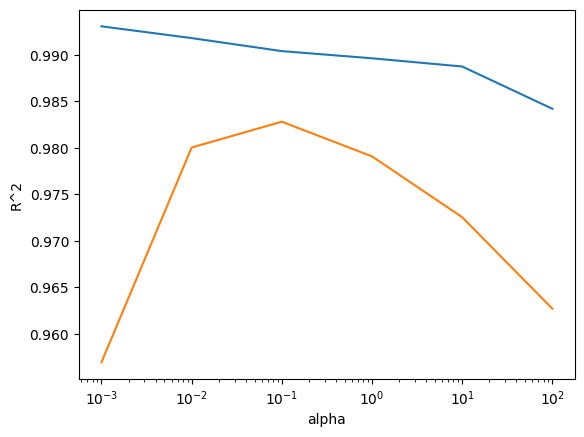

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

위 그래프에서 파란색이 훈련 세트 그래프, 주황색이 테스트 세트 그래프에 해당한다.\
이 그래프를 보면 과대적합임을 알 수 있다. 그러나 오른쪽으로 갈수록 훈련세트와 테스트 세트의 점수가 모두 낮아지는 과소적합이 되어간다.\
이를 통해 적절한 알파값은 10^-1(0.1)임을 알 수 있다.

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [ ]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


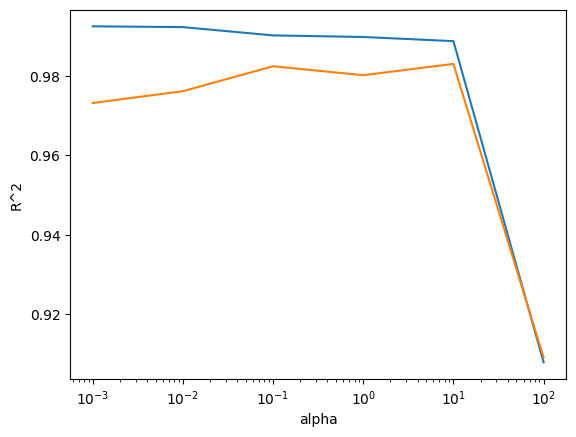

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

이 그래프도 마찬가지로 파란색이 훈련 세트 그래프, 주황색이 테스트 세트 그래프이다. 이 그래프에서 과소적합되지 않는 10^1(10)을 알파값으로 적절함을 알 수 있다.

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


라쏘 모델의 계수는 coef_ 속성에 저장돼있으므로 계수를 0으로 나타내면 어떻게 되는지 확인해보자.

In [ ]:
print(np.sum(lasso.coef_ == 0))

40


40개의 계수가 0이 되었고, 55개 중에 남은 15개만 사용하게 된 것이다.\
이처럼 라쏘 모델을 통해 유용한 특성을 골라내는 용도로 활용할 수 있다.